In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [6]:
from google.colab import files
uploaded = files.upload()

features_df = pd.read_csv("features.csv")

Saving features.csv to features.csv


In [7]:
from google.colab import files
uploaded = files.upload()

stores_df = pd.read_csv("stores.csv")

Saving stores.csv to stores.csv


In [8]:
from google.colab import files
uploaded = files.upload()

train_df = pd.read_csv("train.csv")

Saving train.csv to train.csv


In [9]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [12]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [13]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [14]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [15]:
# Creating a custom season dictionary to identify the season in each month
seasons_dict = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}

Combining the feature, store and sales files

In [16]:
master_df = train_df.merge(stores_df, on='Store', how='left')
master_df = master_df.merge(features_df, on=['Store', 'Date'], how='left')

In [17]:
master_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [18]:
master_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [19]:
master_df.shape

(421570, 17)



```
# This is formatted as code
```

Preliminary Analysis

In [20]:
master_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y        bool
dtype: object

In [21]:
#Checking for null values
master_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [22]:
percentage = (master_df.isna().sum()/master_df.count()*100).sort_values(ascending=False)
percentage

MarkDown2       278.946138
MarkDown4       212.350426
MarkDown3       207.511069
MarkDown1       179.776481
MarkDown5       178.388980
IsHoliday_y       0.000000
Type              0.000000
Dept              0.000000
Date              0.000000
Weekly_Sales      0.000000
IsHoliday_x       0.000000
Fuel_Price        0.000000
Size              0.000000
Temperature       0.000000
Unemployment      0.000000
CPI               0.000000
Store             0.000000
dtype: float64

In [23]:
#Fill the missing values in markdown columns with 0
master_df['MarkDown1'] = master_df['MarkDown1'].fillna(0)
master_df['MarkDown2'] = master_df['MarkDown2'].fillna(0)
master_df['MarkDown3'] = master_df['MarkDown3'].fillna(0)
master_df['MarkDown4'] = master_df['MarkDown4'].fillna(0)
master_df['MarkDown5'] = master_df['MarkDown5'].fillna(0)

In [24]:
master_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

In [25]:
master_df['IsHoliday_x'].value_counts()

False    391909
True      29661
Name: IsHoliday_x, dtype: int64

In [26]:
master_df['IsHoliday_y'].value_counts()

False    391909
True      29661
Name: IsHoliday_y, dtype: int64

In [27]:
#Since IsHoliday_x and IsHoliday_y has got same set of value, lets now remove IsHoliday_y column from the master_df
master_df['isHoliday'] = master_df['IsHoliday_x']
master_df = master_df.drop(columns=['IsHoliday_x', 'IsHoliday_y'])

In [28]:
master_df['MarkDown'] = master_df['MarkDown1'] + master_df['MarkDown2'] + master_df['MarkDown3'] + master_df['MarkDown4'] + master_df['MarkDown5']
master_df['MarkDown']

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
           ...   
421565    9468.01
421566    9659.00
421567    6554.03
421568    3982.42
421569    5247.26
Name: MarkDown, Length: 421570, dtype: float64

In [29]:
master_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'isHoliday', 'MarkDown'],
      dtype='object')

Variable Analysis

In [30]:
#Store
print("Number of Store:",master_df['Store'].nunique())
print("Store: ",master_df['Store'].unique())

Number of Store: 45
Store:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [31]:
#Dept
print("Number of Dept:",master_df['Dept'].nunique())
print("Dept: ",master_df['Dept'].unique())

Number of Dept: 81
Dept:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [32]:
#Holiday
df_holiday = master_df.loc[master_df['isHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [33]:
#Date
master_df['Date'] = pd.to_datetime(master_df['Date'], format='%Y-%m-%d')
master_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
isHoliday                 bool
MarkDown               float64
dtype: object

In [34]:
df_holiday['Date'].nunique()

10

In [35]:
df_not_holiday = master_df.loc[master_df['isHoliday']==False]
df_not_holiday['Date'].nunique()

133

Thus there are 133 weeks for non-holiday and 10 weeks for holiday.

In [36]:
master_df['Week_Number'] = master_df['Date'].dt.week
master_df['Quarter'] = master_df['Date'].dt.quarter
master_df['Quarter'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


3    117488
2    114783
1     97522
4     91777
Name: Quarter, dtype: int64

In [37]:
import calendar # To get month
master_df['Month'] = master_df['Date'].dt.month.apply(lambda x: calendar.month_name[x])
master_df['Month'].value_counts()

April        41332
July         40980
March        38451
October      38362
September    38339
August       38169
June         38137
February     35526
May          35314
December     29802
November     23613
January      23545
Name: Month, dtype: int64

In [38]:
sales_month = master_df.groupby(by=master_df['Month'])['Weekly_Sales','Month'].mean().sort_values(by='Weekly_Sales', ascending = False) # to see the best months for sales
sales_month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Weekly_Sales
Month,
December,19355.702141
November,17491.031424
June,16326.137002
August,16062.516933
February,16008.779217
July,15861.419650
May,15776.337202
April,15650.338357
March,15416.657597


Maximun sales is obtained in the month of December

In [39]:
master_df["Year"] = master_df["Date"].dt.year
master_df['Year'].value_counts()

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

In [40]:
sales_year = master_df.groupby(by=master_df['Year'])['Weekly_Sales','Year'].mean().sort_values(by='Weekly_Sales', ascending = False) # to see the best months for sales
sales_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Weekly_Sales,Year
Year,,
2010,16270.275737,2010
2011,15954.070675,2011
2012,15694.948597,2012


In [41]:
#mapping season with each month
seasons_dict = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}
master_df['Season'] = (master_df['Date'].apply(lambda dt: (dt.month%12 + 3)//3)).map(seasons_dict)
master_df['Season'].value_counts()

Spring    217600
Winter    203970
Name: Season, dtype: int64

In [42]:
#Weekly_Sales
print("Minimum Weekly_Sales value:",master_df['Weekly_Sales'].min())
print("Maximum Weekly_Sales value:",master_df['Weekly_Sales'].max())

Minimum Weekly_Sales value: -4988.94
Maximum Weekly_Sales value: 693099.36


Now,lets look into the average weekly sales for each store and each department There are 45 stores and 81 departments for stores.

In [43]:
#size
print("Minimum Weekly_Sales value:",master_df['Size'].min())
print("Maximum Weekly_Sales value:",master_df['Size'].max())

Minimum Weekly_Sales value: 34875
Maximum Weekly_Sales value: 219622


In [44]:
#Type
master_df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [45]:
pvt_table = pd.pivot_table(master_df, index='Store', columns='Dept', values='Weekly_Sales', aggfunc=np.mean)
display(pvt_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,...,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,...,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,...,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,...,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,89248.965524,66535.407203,159365

From the pivot table, it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week. So, I will change this values.

In [46]:
 #keeping only positive values in weekly sales
master_df = master_df.loc[master_df['Weekly_Sales'] > 0]

In [47]:
master_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
isHoliday                 bool
MarkDown               float64
Week_Number              int64
Quarter                  int64
Month                   object
Year                     int64
Season                  object
dtype: object

In [48]:
#As the data is Time-Series we sort them in ascending order so that the model can perform on the historical data.
master_df=master_df.sort_values(by=['Store', 'Dept', 'Year', 'Week_Number'], ascending=True)    

In [49]:
master_df = master_df.join(pd.get_dummies(master_df['Quarter'], prefix='Quarter'))

In [50]:
master_df['Season'].value_counts()

Spring    216924
Winter    203288
Name: Season, dtype: int64

In [51]:
master_df = master_df.join(pd.get_dummies(master_df['Season'], prefix='Season'))

In [52]:
master_df = master_df.join(pd.get_dummies(master_df['Type'], prefix='Type'))

In [53]:
master_df.dtypes

Store                     int64
Dept                      int64
Date             datetime64[ns]
Weekly_Sales            float64
Type                     object
Size                      int64
Temperature             float64
Fuel_Price              float64
MarkDown1               float64
MarkDown2               float64
MarkDown3               float64
MarkDown4               float64
MarkDown5               float64
CPI                     float64
Unemployment            float64
isHoliday                  bool
MarkDown                float64
Week_Number               int64
Quarter                   int64
Month                    object
Year                      int64
Season                   object
Quarter_1                 uint8
Quarter_2                 uint8
Quarter_3                 uint8
Quarter_4                 uint8
Season_Spring             uint8
Season_Winter             uint8
Type_A                    uint8
Type_B                    uint8
Type_C                    uint8
dtype: o

In [54]:
store_dept = master_df['Store'].unique().shape[0] * master_df['Dept'].unique().shape[0]
print("Unique number of possible store-department pairs: %d" % store_dept)

Unique number of possible store-department pairs: 3645


Exploratory Data Analysis

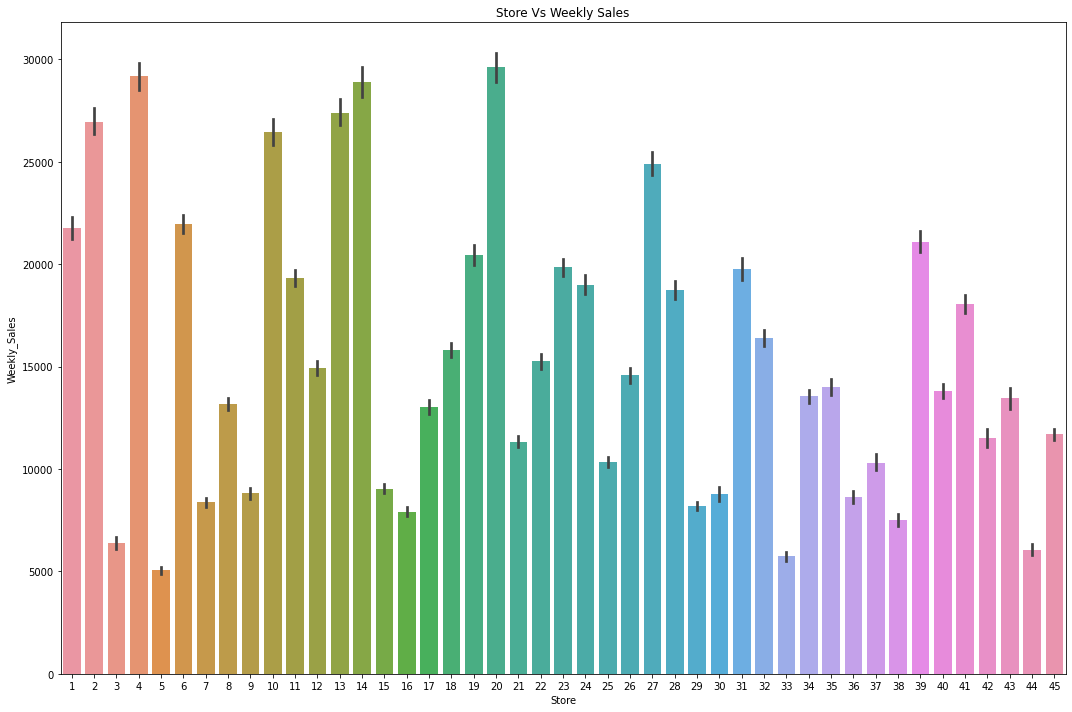

In [55]:
#Store Vs Weekly Sales
plt.figure(figsize=(15,10))
sns.barplot(x="Store", y="Weekly_Sales",  data=master_df)
plt.title("Store Vs Weekly Sales")
plt.tight_layout()
plt.show()

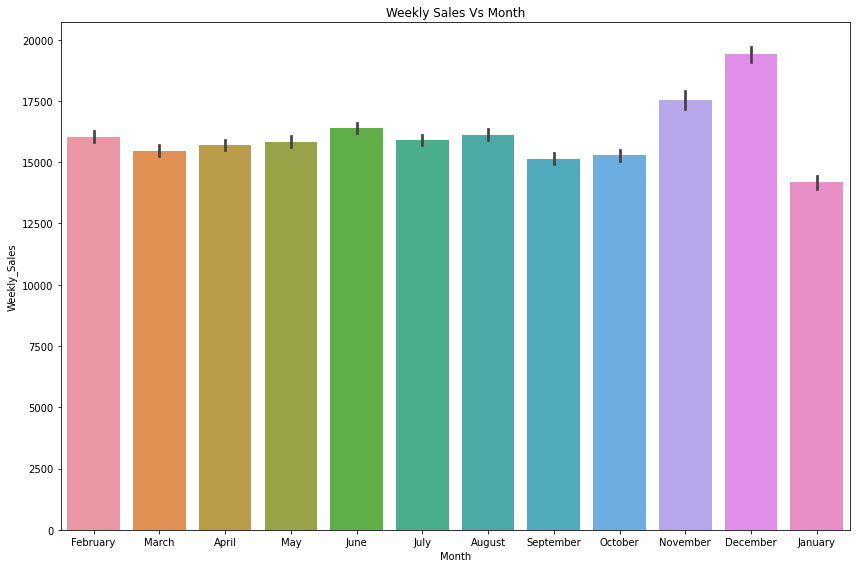

In [56]:
#Weekly Sales Vs Month
plt.figure(figsize=(12,8))
sns.barplot(x="Month", y="Weekly_Sales",  data=master_df)
plt.title("Weekly Sales Vs Month")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Weekly Sales on each Type Per year')

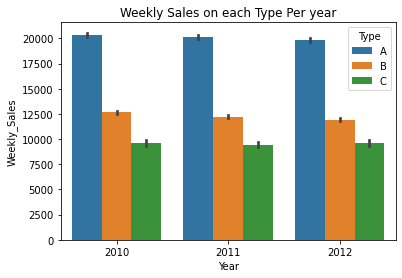

In [57]:
#Weekly Sales on each Type Vs year
sns.barplot(x="Year", y="Weekly_Sales", hue="Type", data=master_df)
plt.title("Weekly Sales on each Type Per year")

In [58]:
master_df['Type'].value_counts()

A    214961
B    162787
C     42464
Name: Type, dtype: int64

Text(0.5, 1.0, 'boxplot for sizes of types of stores')

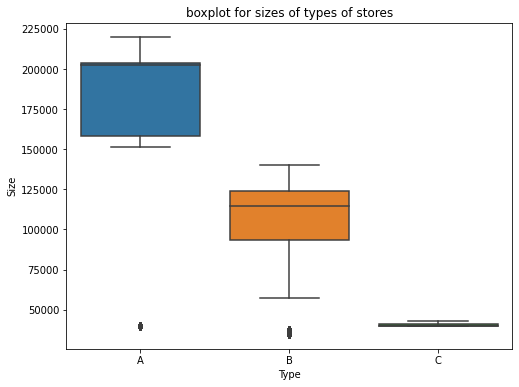

In [59]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=master_df)
plt.title("boxplot for sizes of types of stores")

 From the above plot it is clear that type A store is the largest store and C is the smallest

Text(0.5, 1.0, 'Weekly sales for different types of stores')

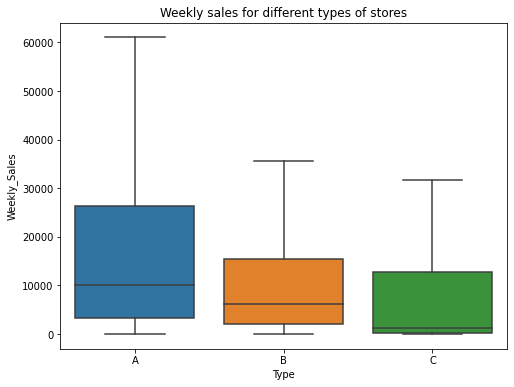

In [60]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=master_df, showfliers=False)
plt.title("Weekly sales for different types of stores")

The median of A is the highest and C is the lowest i.e stores with more sizes have higher sales

Text(0.5, 1.0, 'Holiday/non-holiday vs weekly sales')

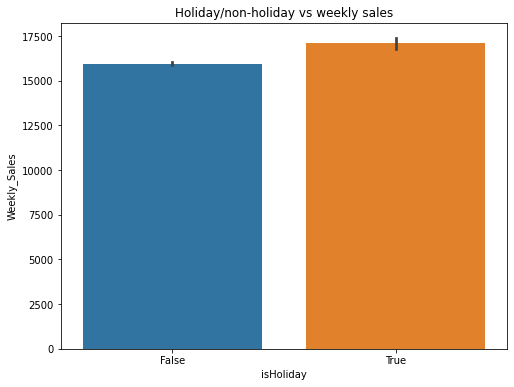

In [61]:
# total count of sales on holidays and non holidays
plt.subplots(figsize=(8, 6))
sns.barplot(x='isHoliday', y='Weekly_Sales', data=master_df)
plt.title("Holiday/non-holiday vs weekly sales")

Sales on holiday is a little bit more than sales in not-holiday

Text(0, 0.5, 'Weekly Sales')

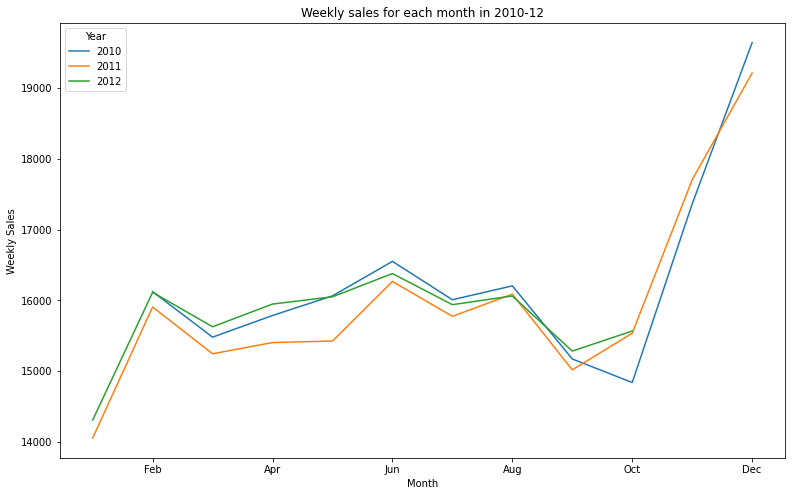

In [62]:
master_df['month_in_digits'] =master_df['Date'].dt.month 
labels = ['Jan', 'Feb','Apr','Jun','Aug','Oct','Dec']
monthly_sales = pd.pivot_table(master_df, values = "Weekly_Sales", columns = "Year", index = "month_in_digits")
ax=monthly_sales.plot(figsize=(13,8))
ax.set_title("Weekly sales for each month in 2010-12")
ax.set_xticklabels(labels)
ax.set_xlabel('Month')
ax.set_ylabel('Weekly Sales')


From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

Text(0, 0.5, 'Weekly Sales')

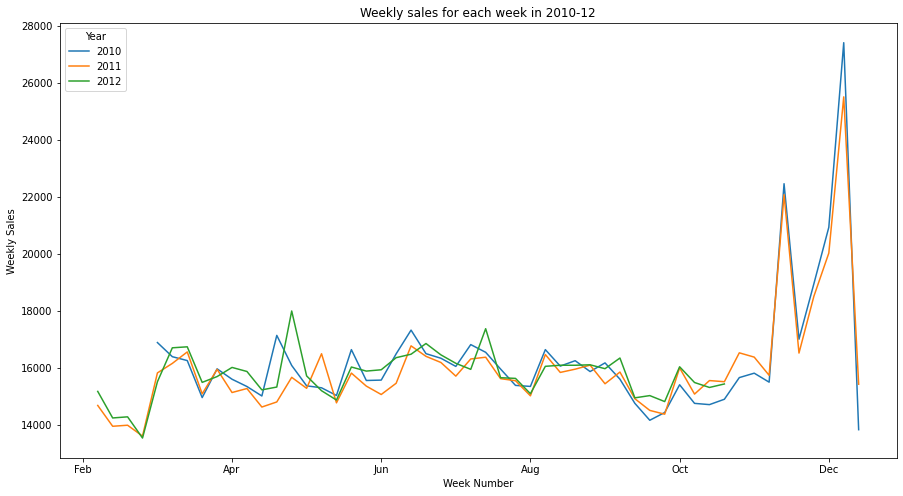

In [63]:
weekly_sales = pd.pivot_table(master_df, values = "Weekly_Sales", columns = "Year", index = "Week_Number")
ax=weekly_sales.plot(figsize=(15,8))
ax.set_title("Weekly sales for each week in 2010-12")
ax.set_xticklabels(labels)
ax.set_xlabel('Week Number')
ax.set_ylabel('Weekly Sales')

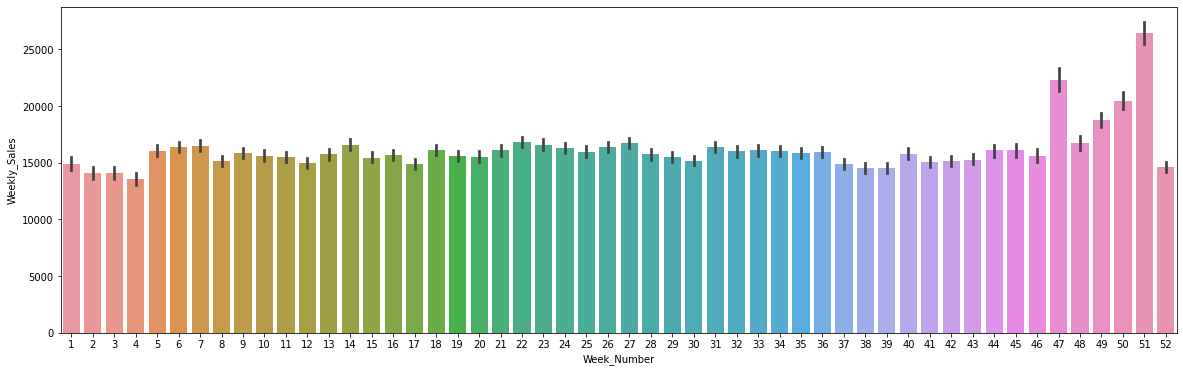

In [64]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Week_Number', y='Weekly_Sales', data=master_df)

From the above two plots, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas and Black Friday effects.


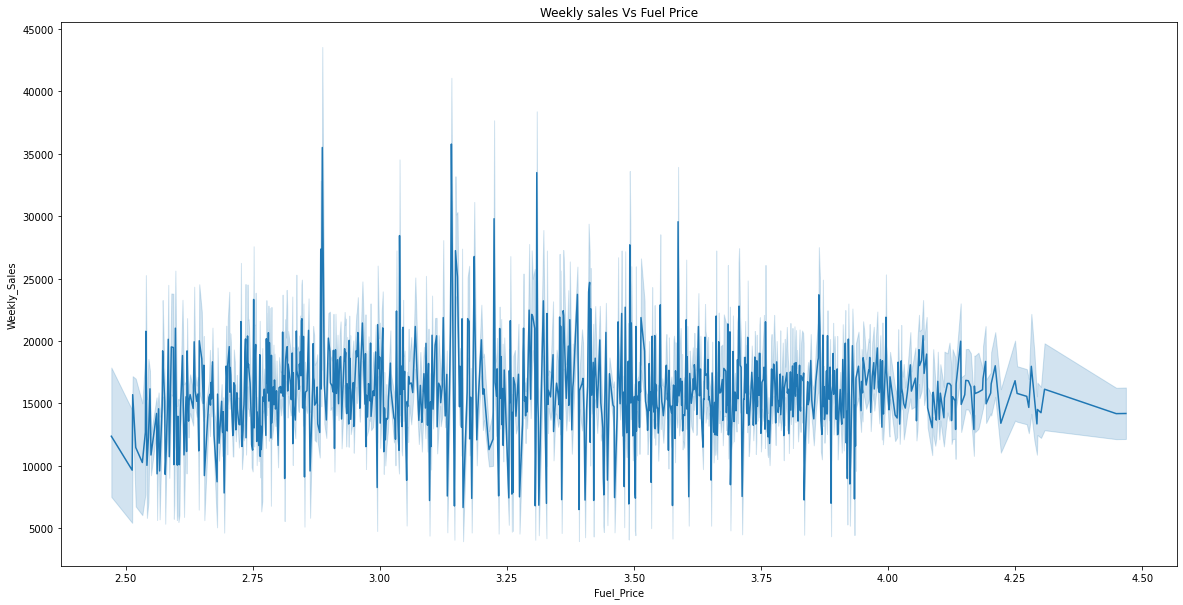

In [65]:
plt.subplots(figsize=(20, 10))
sns.lineplot(x='Fuel_Price', y='Weekly_Sales', data=master_df)
plt.title("Weekly sales Vs Fuel Price")
plt.show()

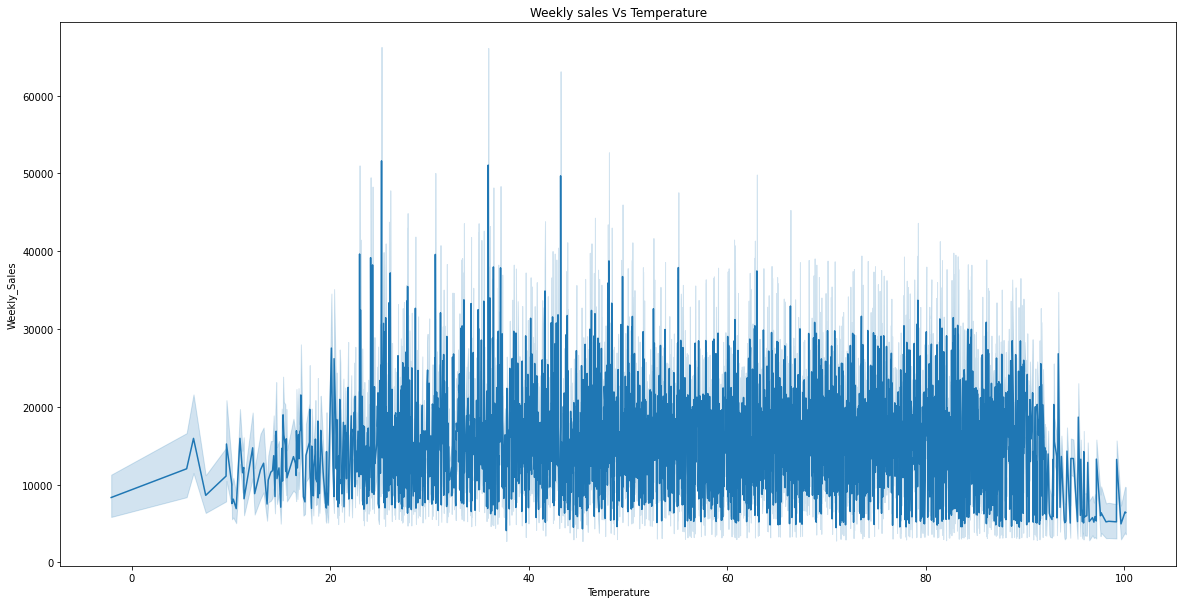

In [66]:
plt.subplots(figsize=(20, 10))
sns.lineplot(x='Temperature', y='Weekly_Sales', data=master_df)
plt.title("Weekly sales Vs Temperature")
plt.show()

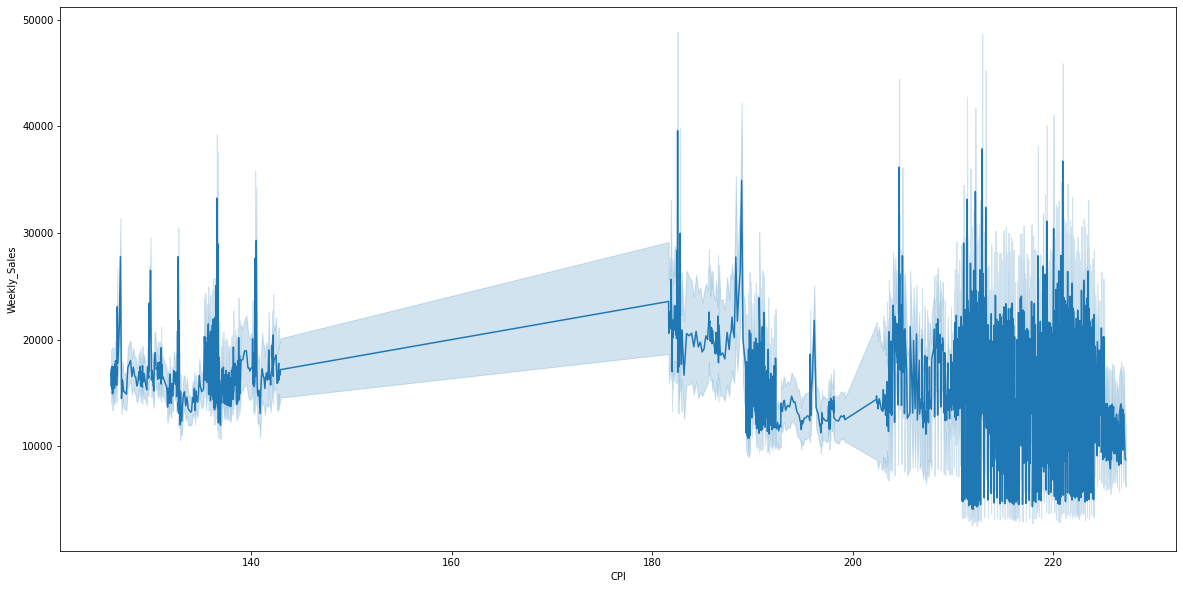

In [67]:
plt.subplots(figsize=(20, 10))
sns.lineplot(x='CPI', y='Weekly_Sales', data=master_df)
plt.show()

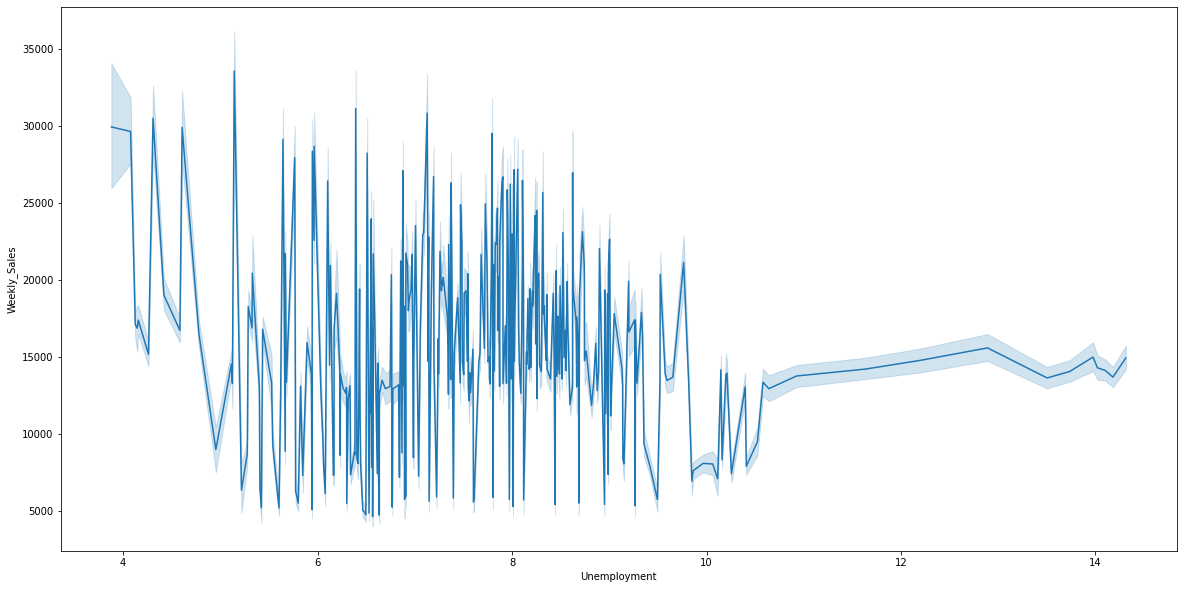

In [68]:
plt.subplots(figsize=(20, 10))
sns.lineplot(x='Unemployment', y='Weekly_Sales', data=master_df)
plt.show()

From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 also.

Checking for outliers

In [69]:
master_df.dtypes

Store                       int64
Dept                        int64
Date               datetime64[ns]
Weekly_Sales              float64
Type                       object
Size                        int64
Temperature               float64
Fuel_Price                float64
MarkDown1                 float64
MarkDown2                 float64
MarkDown3                 float64
MarkDown4                 float64
MarkDown5                 float64
CPI                       float64
Unemployment              float64
isHoliday                    bool
MarkDown                  float64
Week_Number                 int64
Quarter                     int64
Month                      object
Year                        int64
Season                     object
Quarter_1                   uint8
Quarter_2                   uint8
Quarter_3                   uint8
Quarter_4                   uint8
Season_Spring               uint8
Season_Winter               uint8
Type_A                      uint8
Type_B        

TypeError: ignored

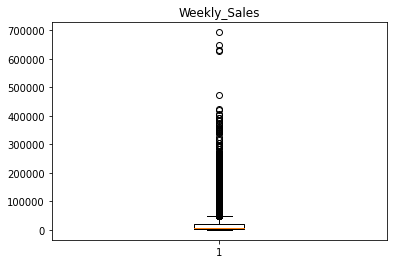

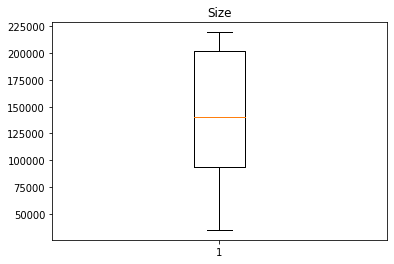

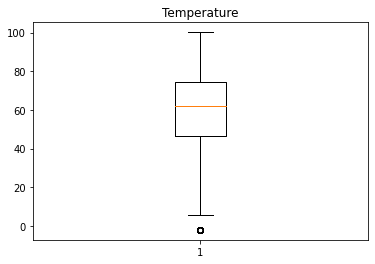

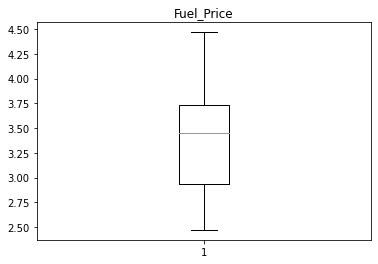

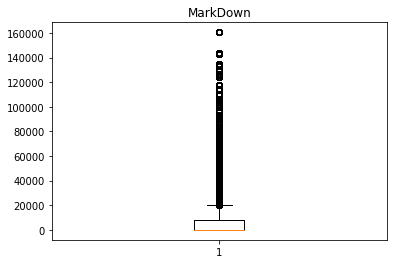

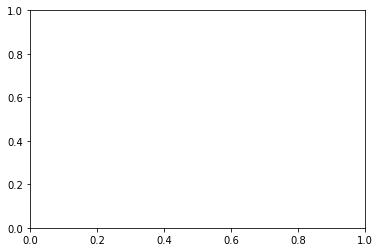

In [70]:
for i in ['Weekly_Sales','Size','Temperature','Fuel_Price','MarkDown','Type']:
  plt.figure()
  plt.boxplot(master_df[i])
  plt.title(i)

Text(0.5, 1.0, 'Weekly Sales Plot')

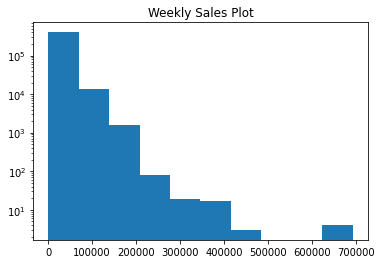

In [71]:
plt.hist(master_df['Weekly_Sales'])
plt.yscale('log')
plt.title("Weekly Sales Plot")

Text(0.5, 1.0, 'MarkDown Plot')

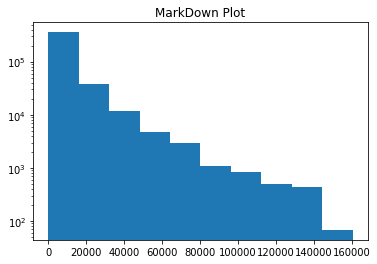

In [72]:
plt.hist(master_df['MarkDown'])
plt.yscale('log')
plt.title("MarkDown Plot")

From the boxplot and Histogram, we can see that Weekly sales feature and Markdown feature has lot of outliers and they have right skewed.But since these outliers are important during the analysis we are not removing the outliers in Weekly sales feature and Markdown feature.

In [73]:
master_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'isHoliday', 'MarkDown',
       'Week_Number', 'Quarter', 'Month', 'Year', 'Season', 'Quarter_1',
       'Quarter_2', 'Quarter_3', 'Quarter_4', 'Season_Spring', 'Season_Winter',
       'Type_A', 'Type_B', 'Type_C', 'month_in_digits'],
      dtype='object')

In [74]:
master_df['isHoliday'].value_counts()

False    390652
True      29560
Name: isHoliday, dtype: int64

In [75]:
#converting IsHoliday variables from true/false to 1/0 on train data
master_df['isHoliday']=np.where((master_df['isHoliday']==True),1,0)
master_df['isHoliday'].value_counts()

0    390652
1     29560
Name: isHoliday, dtype: int64

In [76]:
master_df = master_df.join(pd.get_dummies(master_df['isHoliday'], prefix='IsHoliday'))

In [77]:
master_df.dtypes

Store                       int64
Dept                        int64
Date               datetime64[ns]
Weekly_Sales              float64
Type                       object
Size                        int64
Temperature               float64
Fuel_Price                float64
MarkDown1                 float64
MarkDown2                 float64
MarkDown3                 float64
MarkDown4                 float64
MarkDown5                 float64
CPI                       float64
Unemployment              float64
isHoliday                   int64
MarkDown                  float64
Week_Number                 int64
Quarter                     int64
Month                      object
Year                        int64
Season                     object
Quarter_1                   uint8
Quarter_2                   uint8
Quarter_3                   uint8
Quarter_4                   uint8
Season_Spring               uint8
Season_Winter               uint8
Type_A                      uint8
Type_B        

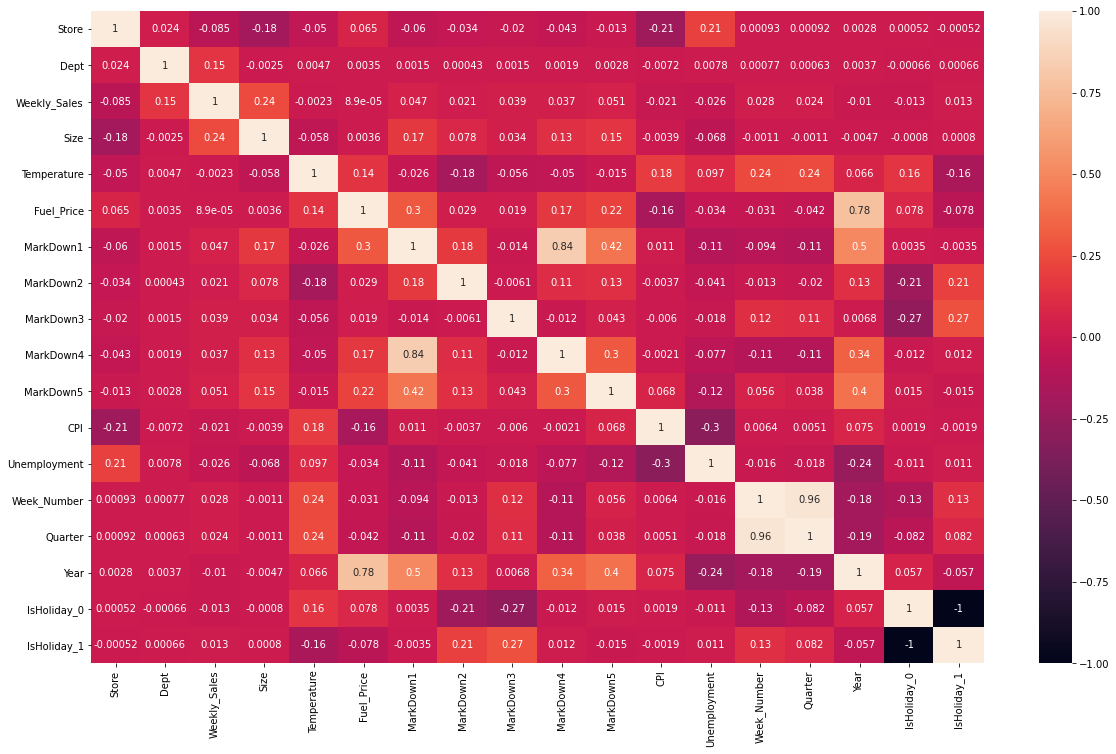

In [78]:
corr_matrix= master_df.drop(columns=['MarkDown','Quarter_1','Quarter_2','Quarter_3','Quarter_4','Season_Spring','Season_Winter','Type_A','Type_B','Type_C','month_in_digits','isHoliday'])
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix.corr(),vmin=-1,vmax=1,annot=True) 

Department - Weekly sales are more for the higher departments.
Fuel price - If the Fuel Price in the area is cheap, more customers will travel to the Store for shopping, But still, that has a very less correlation
CPI - If there is inflation, Cost of goods will rise which causes CPI to increase. This will cause a reduction in sales. It's obvious. But again, This doesn't have much correlation.
For a lesser store number, the weekly sales are higher.
Unemployment, Temperature is less? Sales are higher. (Not much correlation)

Fuel Price is highly correlated to Year (It must be)
Size and Type are negatively correlated
Unemployment, CPI are correlated
Temperature is negatively correlated to unemployment
Week Month Day Quarter are all messing up
Correlated features and skewed must be deleted

In [79]:
master_df.dtypes

Store                       int64
Dept                        int64
Date               datetime64[ns]
Weekly_Sales              float64
Type                       object
Size                        int64
Temperature               float64
Fuel_Price                float64
MarkDown1                 float64
MarkDown2                 float64
MarkDown3                 float64
MarkDown4                 float64
MarkDown5                 float64
CPI                       float64
Unemployment              float64
isHoliday                   int64
MarkDown                  float64
Week_Number                 int64
Quarter                     int64
Month                      object
Year                        int64
Season                     object
Quarter_1                   uint8
Quarter_2                   uint8
Quarter_3                   uint8
Quarter_4                   uint8
Season_Spring               uint8
Season_Winter               uint8
Type_A                      uint8
Type_B        

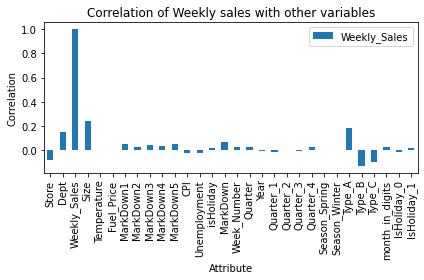

In [80]:
df_corr = master_df.corr()
ax=df_corr[['Weekly_Sales']].plot(kind='bar')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.title('Correlation of Weekly sales with other variables')
plt.tight_layout()
plt.show()

In [81]:
master_df = master_df.drop(columns =['MarkDown1','MarkDown2','MarkDown3','MarkDown4','Quarter','Season','Type','Month','isHoliday','Temperature','MarkDown','Fuel_Price','Season_Spring','Season_Winter'])

In [82]:
#sate1= pd.to_datetime(master_df["Date"], format="%Y-%m-%d").astype(int)
#sate1.head()

In [83]:
master_df.shape

(420212, 20)

In [84]:
x = master_df.drop(["Weekly_Sales","Date"],axis=1)
y = master_df[["Weekly_Sales"]]

In [85]:
x.shape

(420212, 18)

In [86]:
y.shape

(420212, 1)

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)
print("x_test :",x_test.shape)
print("y_test :",y_test.shape)

x_train : (336169, 18)
y_train : (336169, 1)
x_test : (84043, 18)
y_test : (84043, 1)


In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt

Model Building

`Model 1: LinearRegression`

In [89]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)

In [90]:
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Mean squared error:  462911059.17540187
Root mean squared error:  21515.367976760284
R-squared:  0.09376278345609113


Model 2: K-Nearest Neighbors

In [91]:
from sklearn.neighbors import KNeighborsRegressor
r2_value =[]
neighbors = np.arange(1,15)
for k in neighbors:
    regressor = KNeighborsRegressor(n_neighbors=k,metric = 'minkowski')
    regressor.fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    r2_sc=r2_score(y_test,y_pred)
    r2_value.append(r2_sc)

Text(0, 0.5, 'accuracy value')

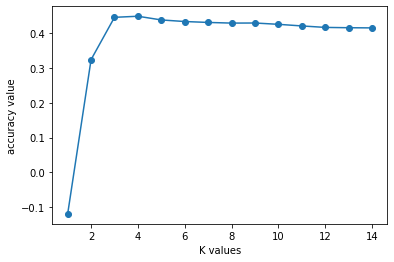

In [92]:
plt.plot(neighbors,r2_value,'o-')
plt.xlabel('K values')
plt.ylabel('accuracy value')

In [93]:
r2_value.index(max(r2_value))

3

In [94]:
knn = KNeighborsRegressor(n_neighbors=r2_value.index(max(r2_value)),metric = 'minkowski')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [95]:
print("Score:",knn.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.44565612933067306
Mean squared error:  283161962.04958755
Root mean squared error:  16827.416974972348
R-squared:  0.445656129330673


Model 3 :  DecisionTree Algorithm

In [96]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train,y_train)
y_pred=dtr_model.predict(x_test)

In [97]:
print("Score:",dtr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.9629828917825534
Mean squared error:  18908546.746621467
Root mean squared error:  4348.395882003094
R-squared:  0.9629828917825535


Model 4 : RandomForestRegressor

In [98]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train,y_train)
y_pred=rfr_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
print("Score:",rfr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.9780850808664608
Mean squared error:  11194263.756390749
Root mean squared error:  3345.782981065979
R-squared:  0.9780850808664608


Model 5 : XGBRegressor Model

In [100]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5)
xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)

[18:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [101]:
print("Score:",xgb_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.9761926653192577
Mean squared error:  12160920.244740054
Root mean squared error:  3487.2511014752085
R-squared:  0.9761926653192577


Model 6: ExtraTreesRegressor Model

In [102]:
from sklearn.ensemble import ExtraTreesRegressor
xtr_model = ExtraTreesRegressor()
xtr_model.fit(x_train,y_train)
y_pred=xtr_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
print("Score:",xgb_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.9761926653192577
Mean squared error:  12911861.990276553
Root mean squared error:  3593.3079453724185
R-squared:  0.9747225527700482


Scaling - Standard Scaling

In [104]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [105]:
scaler = StandardScaler()
x_rs= scaler.fit_transform(x)
x_train,x_test,y_train, y_test=train_test_split(x_rs,y,test_size=0.2,random_state=42)

Model 1: LinearRegression After Standard Scaling


In [106]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
print("Score:",lr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.09375914904149718
Mean squared error:  462912915.65478545
Root mean squared error:  21515.411119817938
R-squared:  0.09375914904149718


Model 2: K-Nearest Neighbors After Standard Scaling

In [107]:
knn = KNeighborsRegressor(n_neighbors=r2_value.index(max(r2_value)),metric = 'minkowski')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Score:",knn.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.30857920905361946
Mean squared error:  353181622.6809918
Root mean squared error:  18793.12700646148
R-squared:  0.30857920905361946


Model 3 :  DecisionTree Algorithm After Standard Scaling

In [108]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train,y_train)
y_pred=dtr_model.predict(x_test)
print("Score:",dtr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.9597437095120767
Mean squared error:  20563139.239972193
Root mean squared error:  4534.6597711374325
R-squared:  0.9597437095120767


Model 4 : RandomForestRegressor After Standard Scaling

In [109]:
rfr_model = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=4)
rfr_model.fit(x_train,y_train)
y_pred=rfr_model.predict(x_test)
print("Score:",rfr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score: 0.9655071957263505
Mean squared error:  17619118.116929844
Root mean squared error:  4197.513325402297
R-squared:  0.9655071957263506


Model 5 : XGBRegressor Model After Standard Scaling

In [110]:
xgb_model = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5)
xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)
print("Score:",xgb_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

[18:45:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score: 0.9756786716369836
Mean squared error:  12423471.103971377
Root mean squared error:  3524.6944695918505
R-squared:  0.9756786716369835


Model 6: ExtraTreesRegressor Model After Standard Scaling

In [111]:
xtr_model = ExtraTreesRegressor(n_estimators=30,n_jobs=4)
xtr_model.fit(x_train,y_train)
y_pred=xtr_model.predict(x_test)
print("Score:",xgb_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score: 0.9756786716369836
Mean squared error:  12686668.380413407
Root mean squared error:  3561.834973775934
R-squared:  0.9751634124689921


Scaling - MinMax Scaling

In [112]:
minmax = MinMaxScaler()
x_minmax = minmax.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_minmax,y,random_state=42,test_size=.2)

Model 1: LinearRegression after MinMax Scaling

In [113]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
print("Score:",lr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.0937627834560899
Mean squared error:  462911059.17540246
Root mean squared error:  21515.367976760295
R-squared:  0.0937627834560899


Model 2: K-Nearest Neighbors after MinMax Scaling

In [114]:
knn = KNeighborsRegressor(n_neighbors=r2_value.index(max(r2_value)),metric = 'minkowski')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Score:",knn.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.46508207720072753
Mean squared error:  273239078.7913745
Root mean squared error:  16529.944911928003
R-squared:  0.4650820772007276


Model 3 :  DecisionTree Algorithm after MinMax Scaling

In [115]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train,y_train)
y_pred=dtr_model.predict(x_test)
print("Score:",dtr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.9616960806554798
Mean squared error:  19565857.096403994
Root mean squared error:  4423.3309955738105
R-squared:  0.9616960806554797


Model 4 : RandomForestRegressor after MinMax Scaling

In [116]:
rfr_model = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=4)
rfr_model.fit(x_train,y_train)
y_pred=rfr_model.predict(x_test)
print("Score:",rfr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score: 0.9656106222746017
Mean squared error:  17566287.25529259
Root mean squared error:  4191.215486621106
R-squared:  0.9656106222746017


Model 5 : XGBRegressor Model after MinMax Scaling

In [117]:
xgb_model = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5)
xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)
print("Score:",xgb_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

[19:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score: 0.9756800353968016
Mean squared error:  12422774.48779811
Root mean squared error:  3524.5956488366305
R-squared:  0.9756800353968016


Model 6: ExtraTreesRegressor Model after MinMax Scaling

In [118]:
xtr_model = ExtraTreesRegressor(n_estimators=30,n_jobs=4)
xtr_model.fit(x_train,y_train)
y_pred=xtr_model.predict(x_test)
print("Score:",xgb_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score: 0.9756800353968016
Mean squared error:  13506513.550309706
Root mean squared error:  3675.1208892102727
R-squared:  0.9735584082461781


Scaling - Robust Scaling 

In [119]:
scaler = RobustScaler()
x_rs= scaler.fit_transform(x)
x_train,x_test,y_train, y_test=train_test_split(x_rs,y,test_size=0.2,random_state=42)

Model 1: LinearRegression after Robust Scaling

In [120]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
print("Score:",lr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.09376278345609146
Mean squared error:  462911059.1754016
Root mean squared error:  21515.367976760277
R-squared:  0.09376278345609146


Model 2: K-Nearest Neighbors after Robust Scaling

In [121]:
knn = KNeighborsRegressor(n_neighbors=r2_value.index(max(r2_value)),metric = 'minkowski')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Score:",knn.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.3087149200605085
Mean squared error:  353112300.7365893
Root mean squared error:  18791.28257295359
R-squared:  0.3087149200605085


Model 3 :  DecisionTree Algorithm after Robust Scaling

In [122]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train,y_train)
y_pred=dtr_model.predict(x_test)
print("Score:",dtr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

Score: 0.9628970967170445
Mean squared error:  18952371.347864725
Root mean squared error:  4353.432134289534
R-squared:  0.9628970967170445


Model 4 : RandomForestRegressor after Robust Scaling

In [123]:
rfr_model = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=4)
rfr_model.fit(x_train,y_train)
y_pred=rfr_model.predict(x_test)
print("Score:",rfr_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score: 0.9659777060880188
Mean squared error:  17378778.782044094
Root mean squared error:  4168.786248063589
R-squared:  0.9659777060880189


Model 5 : XGBRegressor Model after Robust Scaling

In [124]:
xgb_model = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5)
xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)
print("Score:",xgb_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

[19:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score: 0.9756880004445168
Mean squared error:  12418705.896697616
Root mean squared error:  3524.0184302437488
R-squared:  0.9756880004445166


Model 6: ExtraTreesRegressor Model after Robust Scaling

In [125]:
xtr_model = ExtraTreesRegressor(n_estimators=30,n_jobs=4)
xtr_model.fit(x_train,y_train)
y_pred=xtr_model.predict(x_test)
print("Score:",xgb_model.score(x_test,y_test))
print("Mean squared error: ", mse(y_test, y_pred))
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score: 0.9756880004445168
Mean squared error:  13038692.306918414
Root mean squared error:  3610.9129464608272
R-squared:  0.974474258090436


Trying feature importance
Since linear regression and KNN model do not show much accuracy in the model, we can try feature importance for the remaining models

In [126]:
y_pred

array([ 4657.08166667, 42278.64266667, 13088.43033333, ...,
        9066.72666667,  1199.00266667, 20563.932     ])